In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [33]:
batch_size = 16
image_height = 180
image_width = 180

In [34]:
df = tf.keras.utils.image_dataset_from_directory(
    "Augmented IQ-OTHNCCD lung cancer dataset",
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = (batch_size)
)

Found 3609 files belonging to 3 classes.
Using 2888 files for training.


In [35]:
class_names = df.class_names
print(class_names)

['Benign cases', 'Malignant cases', 'Normal cases']


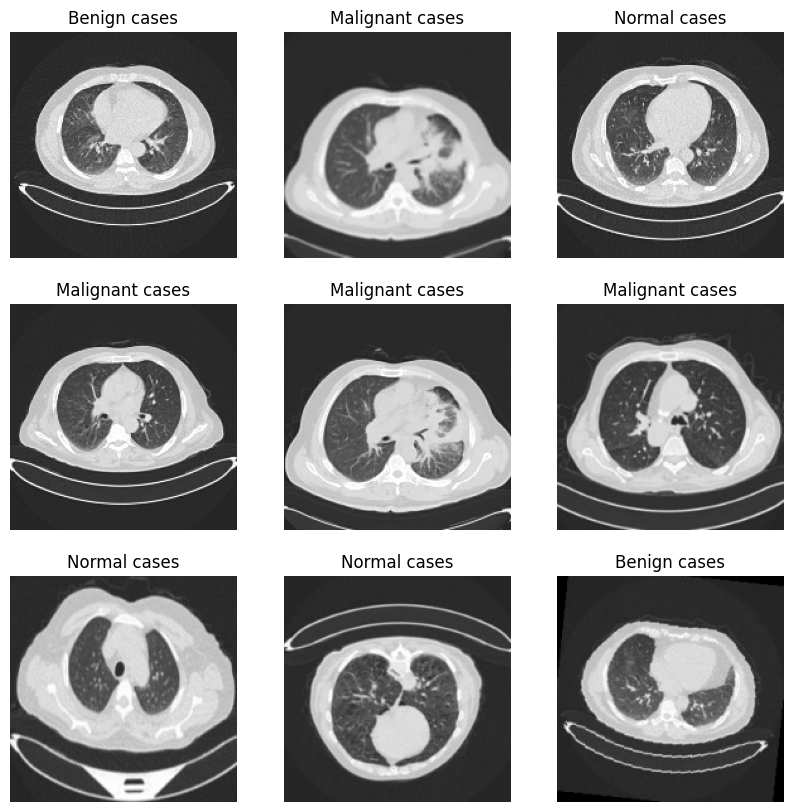

In [36]:
plt.figure(figsize=(10,10))
for images, labels in df.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [37]:
for image_batch, labels_batch in df:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 180, 180, 3)
(16,)


Found 3609 files belonging to 3 classes.
Using 2888 files for training.


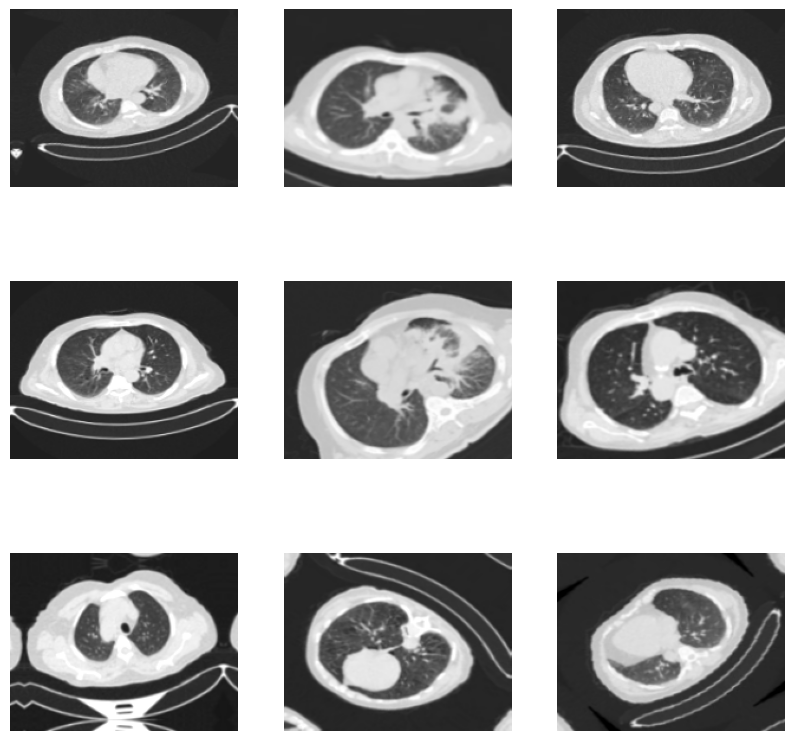

2025-03-22 12:40:52.568937: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
from tensorflow.keras import layers

# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),  # Random horizontal flip
    layers.RandomRotation(0.2),  # Random rotation
    layers.RandomZoom(0.2),  # Random zoom
    layers.RandomHeight(0.2),  # Random height shift
    layers.RandomWidth(0.2),  # Random width shift
    layers.RandomContrast(0.2),  # Random contrast change
])

# Apply data augmentation during training
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "Augmented IQ-OTHNCCD lung cancer dataset",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

# Add data augmentation layer
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))

# Visualize a batch of augmented images
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

In [39]:
for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 212, 196, 3)
(16,)


In [40]:
def resize_image(image, label):
    image = tf.image.resize(image, (224, 224))
    return image, label

# Applying the resize function to the dataset
df_resized = train_dataset.map(resize_image)

In [41]:
#Normalization
normalization_layer = tf.keras.layers.Rescaling(1/.255)

In [42]:
normalized_df = df_resized.map(lambda images, labels:(normalization_layer(images),labels))

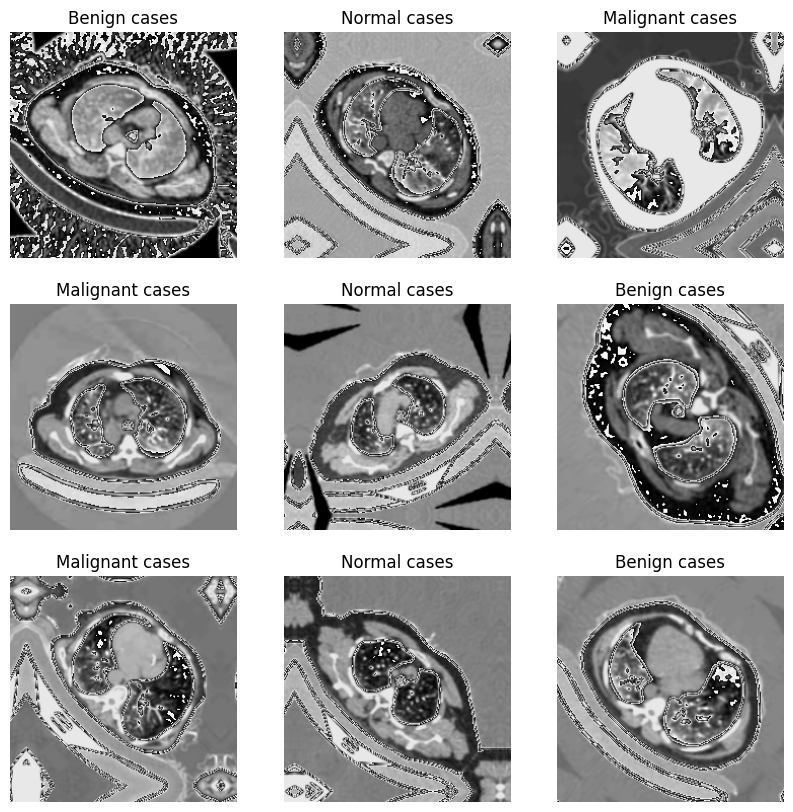

In [43]:
plt.figure(figsize=(10,10))
for images, labels in normalized_df.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [44]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [45]:
encoded_labels = label_encoder.fit_transform(labels)
print("Encoded labels:", encoded_labels)

Encoded labels: [0 2 1 1 2 0 1 2 0 2 1 2 2 2 1 0]
